In [23]:
import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [37]:
Mashenka = open("c:\\Users\\maria\\Downloads\\Nabokov_Mashenka.txt").read() #Машенька (1926)
Camera = open("c:\\Users\\maria\\Downloads\\Camera_Obscura.txt").read() # Камера обскура (1932)
Despair = open("c:\\Users\\maria\\Downloads\\Nabokov_-_Otchayanie.txt").read() # Отчаяние (1934)
Gift = open("c:\\Users\\maria\\Downloads\\Dar.txt").read() # Дар (1938)
Lolita = open("c:\\Users\\maria\\Downloads\\Lolita1.txt").read() #Лолита (1955)
Transparent = open("c:\\Users\\maria\\Downloads\\Prozrachnye_predmety.txt").read() #Прозрачные предметы (1972)

In [97]:
def diversity(text):
    words = WhitespaceTokenizer().tokenize(text)
    lexical_diversity = len(set(words)) / len(words) * 100
    return lexical_diversity

def most_common_words(text):
    words = WhitespaceTokenizer().tokenize(text)
    my_stop = ['--', '-', '—', '–','это', 'том', 'то', 'того', 'и,', 'которые', 'который', 'которого', 'которой', 'он,', 'я,', 'меня,', 'которую', 'того,', 'то,']
    stop = stopwords.words('russian') + my_stop
    filtered_words = [word for word in words if word.lower() not in stop]

    fdist_words = FreqDist(filtered_words)
    print('Cамые частые слова: ', fdist_words.most_common(10))

    filtered_text = " ".join(filtered_words)
    wordcloud = WordCloud().generate(filtered_text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

def parts_of_speech(text):
    words = WhitespaceTokenizer().tokenize(text)
    tagged = nltk.pos_tag(words)
    parts_speech = Counter(tag for word, tag in tagged)
    total_speech = sum(parts_speech.values())
    proportion = dict((word, float(count) / total_speech) for word, count in parts_speech.items())
    print('Соотношение частей речи ко всему тексту:', proportion)
    return proportion

In [51]:
diversity(Mashenka)
diversity(Camera)
diversity(Despair)
diversity(Gift)
diversity(Lolita)
diversity(Transparent)

Лексическое разнообразие:  45.237059591126574
Лексическое разнообразие:  49.755557605386954
Лексическое разнообразие:  39.108550084270945
Лексическое разнообразие:  38.45937982320752
Лексическое разнообразие:  38.166419483256576
Лексическое разнообразие:  50.29691211401425


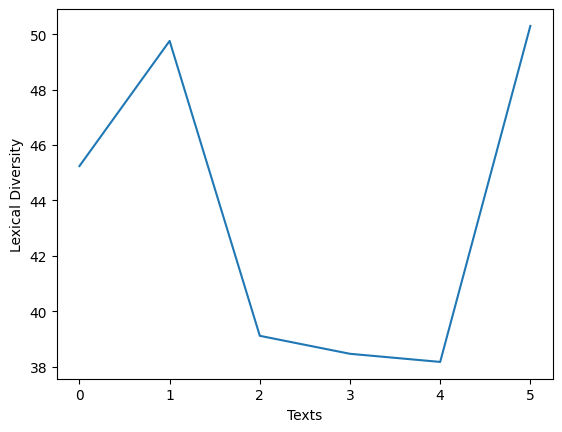

In [89]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
lexical_diversities = []

for text in texts:
    lexical_diversity = diversity(text)
    lexical_diversities.append(lexical_diversity)

plt.plot(lexical_diversities)
plt.xlabel("Texts")
plt.ylabel("Lexical Diversity")
plt.show()

Любопытно, что самое большое лексическое разнообразие имееют "Прозрачные предметы", которые являются переводом Д. Чекалова оригинального текста Набокова на английском языке. 

Остальные произведения либо изначально писались Набоковым на русском, либо были переведены им же на русский язык.

Cамые частые слова:  [('Ганин', 113), ('сказал', 55), ('очень', 51), ('Ганин,', 44), ('Подтягин', 33), ('Клара', 32), ('Алферов', 30), ('Антон', 28), ('Машенька', 27), ('Лев', 24)]


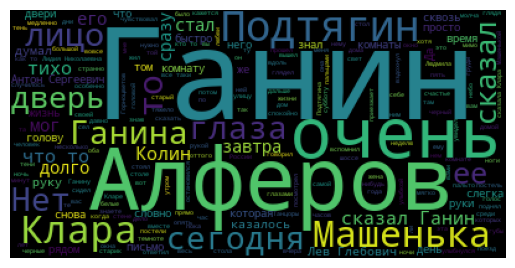

Cамые частые слова:  [('Кречмар', 49), ('Магда', 39), ('сказал', 26), ('очень', 25), ('сказала', 17), ('Макс', 17), ('Кречмар,', 15), ('своей', 14), ('подумал', 14), ('Аннелиза', 14)]


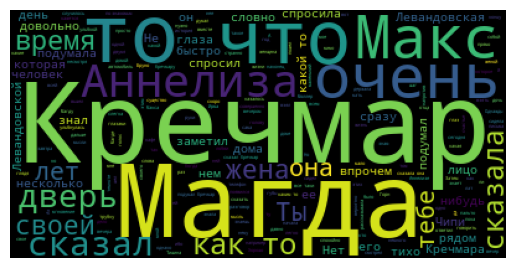

Cамые частые слова:  [('мнe', 217), ('сказал', 103), ('очень', 57), ('мое', 53), ('всe', 48), ('гдe', 45), ('Лида', 45), ('Мнe', 41), ('моей', 39), ('тебe', 38)]


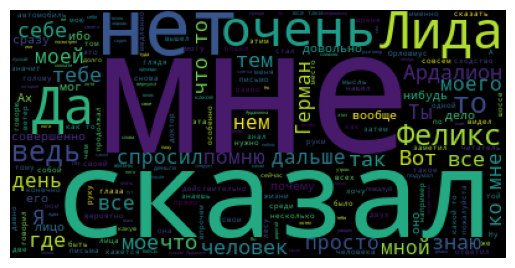

Cамые частые слова:  [('Федор', 210), ('Чернышевский', 145), ('Константинович', 123), ('с.', 108), ('сказал', 107), ('очень', 106), ('т.', 89), ('своей', 87), ('среди', 77), ('совершенно', 77)]


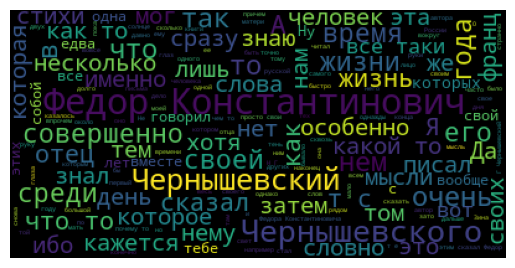

Cамые частые слова:  [('моей', 154), ('мог', 122), ('очень', 113), ('Лолита', 103), ('она,', 95), ('моего', 91), ('несколько', 84), ('мою', 84), ('быть,', 80), ('совершенно', 76)]


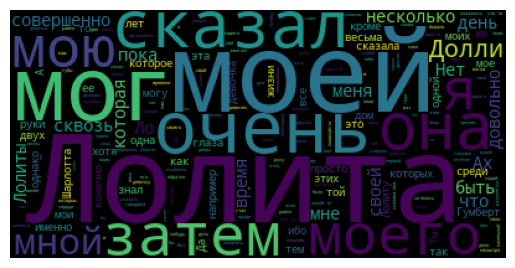

Cамые частые слова:  [('Хью', 99), ('Арманда', 35), ('Персон', 32), ('время', 26), ('R.', 26), ('слишком', 25), ('сказал', 24), ('своей', 23), ('Хью,', 21), ('лет', 20)]


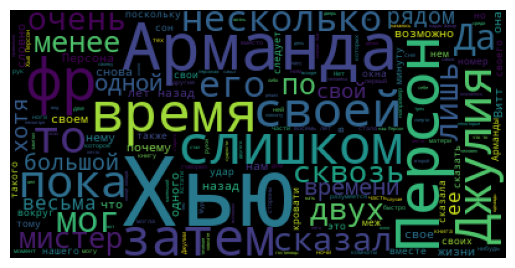

In [77]:
most_common_words(Mashenka)
most_common_words(Camera)
most_common_words(Despair)
most_common_words(Gift)
most_common_words(Lolita)
most_common_words(Transparent)


Наиболее встречающееся слово в ранних книгах Владимира Набокова - фамилии главных героев: в "Машеньке" - Ганин, в "Камере обскура" - Кречман.

В "Отчаянии" повествование ведется от первого лица, поэтому преобладают местоимения этого лица. Та же ситуация прослеживается в "Лолите".

В романах "Дар" и "Прозрачные предметы" Владимир Владимирович уже называет главного героя чаще по имени, чем по фамилии. 

Почти в каждой книге в топ-10 слов входит наречие "очень", довольно часто встречаются такие наречия как "слишком" и "совершенно".
 

Соотношение частей речи ко всему тексту: {'JJ': 0.058997983312902846, 'NNP': 0.9073510221835581, 'PRP': 3.9542884257977775e-05, ':': 0.015738067934675155, 'VBP': 0.00043497172683775554, 'NN': 0.016489382735576732, 'DT': 7.908576851595555e-05, 'POS': 3.9542884257977775e-05, 'CD': 0.00043497172683775554, 'VBD': 0.00035588595832179997, 'VBZ': 3.9542884257977775e-05}
Соотношение частей речи ко всему тексту: {'JJ': 0.013098422654736649, 'NNP': 0.9811825477354488, 'PRP': 0.00018448482612305137, 'VBP': 9.224241306152569e-05, 'CD': 0.001475878608984411, ':': 0.0009224241306152569, 'NN': 0.0013836361959228853, 'SYM': 0.00018448482612305137, 'FW': 9.224241306152569e-05, 'VBZ': 0.00018448482612305137, 'VBD': 0.0010146665436767826, 'NNS': 9.224241306152569e-05, 'RB': 9.224241306152569e-05}
Соотношение частей речи ко всему тексту: {'JJ': 0.01086411879925295, 'NN': 0.00027331116476108047, 'PRP': 2.2775930396756706e-05, 'VBP': 4.555186079351341e-05, 'NNP': 0.9876782216553546, 'VBZ': 0.000569398259918

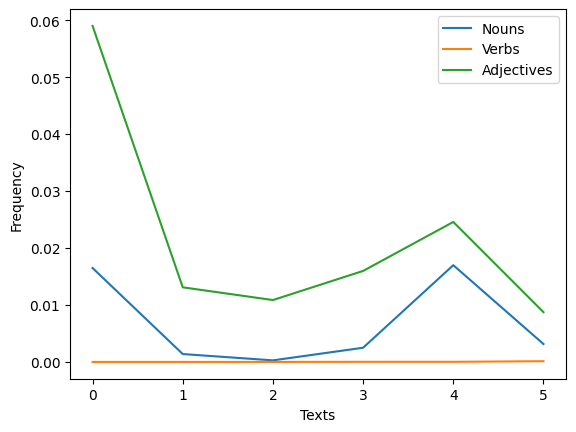

In [104]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
parts_of_speech_list = []

for text in texts:
    parts_of_speech_result = parts_of_speech(text)
    parts_of_speech_list.append(parts_of_speech_result)

noun_values = [d.get('NN', 0) for d in parts_of_speech_list]
verb_values = [d.get('VB', 0) for d in parts_of_speech_list]
adjective_values = [d.get('JJ', 0) for d in parts_of_speech_list]

plt.plot(noun_values, label='Nouns')
plt.plot(verb_values, label='Verbs')
plt.plot(adjective_values, label='Adjectives')
plt.xlabel("Texts")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Визуализация помогает нам определить, что тексты Набокова богаты на описания. Особенно в этом плане отличилась "Машенька".

Также отчетливо видно, что динамичность текстов остается на одном уровне во всех произведениях.

Вывод: анализ лексического разнообразия текстов Набокова помогает нам определить, что самыми разнообразными были первые романы писателя на русском, и одно из последних произведений автора, написанное на английском. Важно отметить, что самое известное произведение автора "Лолита", имеет самое маленькое лексическое разнообразие. Из анализа наиболее часто используемых слов в каждом произведении можно сделать вывод, что во всех произведениях Набокова присутствует большое количество диалогов, что может говорить о том, что автор обращает большое внимание на характеры и взаимодействия персонажей. Это подкрепляется анализом количества частей речи в тексте, который показывает, что наибольшее внимание в текстах Набокова всегда уделяется прилагательным, которые используется для создания полноценных портретов персонажей. 